<a href="https://colab.research.google.com/github/farnazmnz/Time-Series-Forecasting/blob/main/demand_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Data.csv')

In [ ]:
data

,Unnamed: 0,Date_x,GDS_x,PLN_GROUP_x,QUALITY_F_x,DES_EN_x,YYMM_x,Date & GDS & PLN,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,0,28,16201007,BP,GS,SBS,140206,GS-16201007-140206-BP,58964,134,38297,41000
1,1,28,16201007,BP,GS,SBS,140205,GS-16201007-140205-BP,57489,493,44956,47200
2,2,28,16201007,BP,GS,SBS,140204,GS-16201007-140204-BP,58544,475,19138,68000
3,3,28,16201007,BP,GS,SBS,140203,GS-16201007-140203-BP,74039,461,29285,46750
4,4,28,16201007,BP,GS,SBS,140202,GS-16201007-140202-BP,51043,474,1764,37300
...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,102,2705004,BP,OEM,SBS,140006,OEM-2705004-140006-BP,8446,569,17917,1200
158,158,102,2705004,BP,OEM,SBS,140008,OEM-2705004-140008-BP,7217,538,3180,3000
159,159,102,2705004,BP,OEM,SBS,140009,OEM-2705004-140009-BP,8198,556,1279,2100
160,160,102,2705004,BP,OEM,SBS,140010,OEM-2705004-140010-BP,8505,597,587,2330


In [ ]:
data['Date_x'].value_counts()

Date_x
35     25
68     20
28     19
50     19
56     18
49     16
102    16
85     13
57     12
41      4
Name: count, dtype: int64

In [ ]:
dfs = {}

for i in range(28, 103):
    dfs[i] = data[data['Date_x'] == i]

In [ ]:
dfs[68] = dfs[68].sort_values(by='YYMM_x', ascending=True)

In [ ]:
df = dfs[68]

In [ ]:
df = df.drop(columns=['Unnamed: 0' ,'Date_x' ,'GDS_x' ,'PLN_GROUP_x' ,'QUALITY_F_x' ,'DES_EN_x' ,'YYMM_x', 'Date & GDS & PLN'])

In [ ]:
df

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
124,6399,185,142794,1651
122,11328,275,130951,2304
126,7950,272,121503,1593
127,16489,281,117251,12515
128,13807,385,117261,25798
129,10212,152,74196,23076
130,10323,240,93883,21939
131,16393,330,99863,2256
123,13338,429,78643,19712
113,19585,391,40055,13161


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df_lr = df.copy()

In [ ]:
features = df_lr[['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
target = df_lr['Demand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 27958249.055320695


In [ ]:
next_12_data = df_lr.iloc[-12:][['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
next_12_predictions = model_lr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [13217.69979981 13862.97148972 14125.64601791 14421.46544819
 14730.39474773 14535.13871117 14650.78754652 14336.6898155
 14379.99067529 14234.29921801 13730.43036645 13870.36493176]


In [ ]:
df_to_append = pd.DataFrame(columns=df_lr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_lr = pd.concat([df_lr, df_to_append], ignore_index=True)

In [ ]:
df_lr

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,6399.000000,185,142794,1651
1,11328.000000,275,130951,2304
2,7950.000000,272,121503,1593
3,16489.000000,281,117251,12515
4,13807.000000,385,117261,25798
5,10212.000000,152,74196,23076
6,10323.000000,240,93883,21939
7,16393.000000,330,99863,2256
8,13338.000000,429,78643,19712
9,19585.000000,391,40055,13161


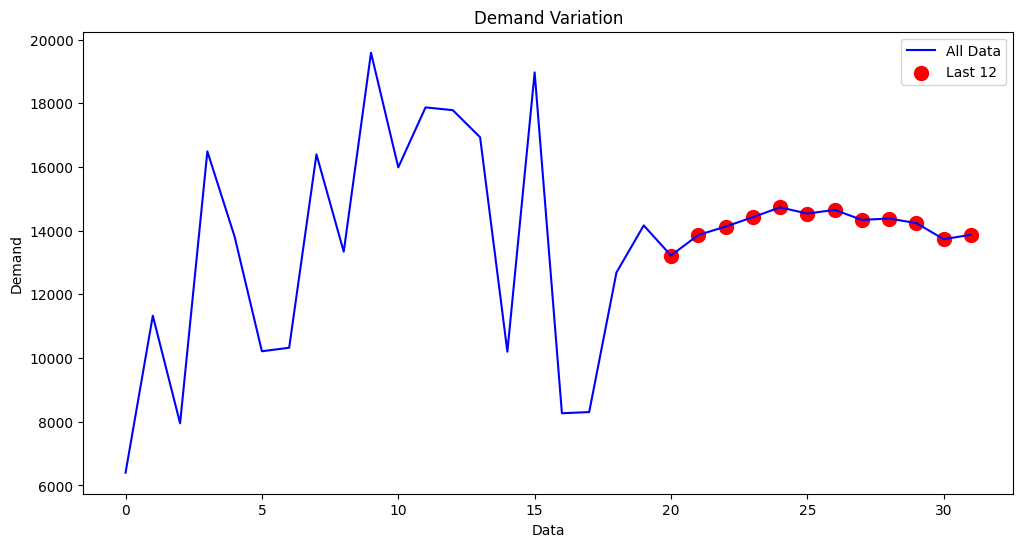

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_lr.index, df_lr['Demand'], label='All Data', color='blue')
plt.scatter(df_lr.index[-12:], df_lr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_lr['Percentage Change'] = df_lr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_lr['Percentage Change'] >= -tolerance) & (df_lr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
df_svr = df.copy()

In [ ]:
features = df_svr[['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
target = df_svr['Demand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model_svr = SVR(kernel='linear')

In [ ]:
model_svr.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
predictions = model_svr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 49721028.91475572


In [ ]:
next_12_data = df_svr.iloc[-12:][['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
next_12_predictions = model_svr.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [13190.16906736 14626.69723413 15732.33510778 16844.94499204
 17727.91443441 16401.70464251 16828.91567037 15375.50988815
 15420.95900919 14864.66839418 12671.42628953 14363.15655515]


In [ ]:
df_to_append = pd.DataFrame(columns=df_svr.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_svr = pd.concat([df_svr, df_to_append], ignore_index=True)

In [ ]:
df_svr

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,6399.000000,185,142794,1651
1,11328.000000,275,130951,2304
2,7950.000000,272,121503,1593
3,16489.000000,281,117251,12515
4,13807.000000,385,117261,25798
5,10212.000000,152,74196,23076
6,10323.000000,240,93883,21939
7,16393.000000,330,99863,2256
8,13338.000000,429,78643,19712
9,19585.000000,391,40055,13161


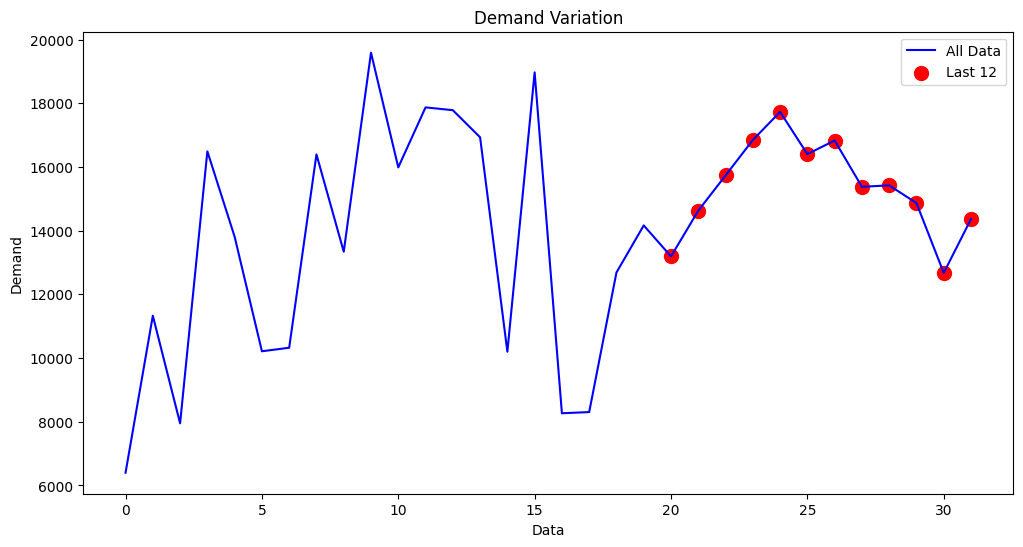

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_svr.index, df_svr['Demand'], label='All Data', color='blue')
plt.scatter(df_svr.index[-12:], df_svr['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_svr['Percentage Change'] = df_svr['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_svr['Percentage Change'] >= -tolerance) & (df_svr['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df_dt = df.copy()

In [ ]:
features = df_dt[['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
target = df_dt['Demand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model_dt = DecisionTreeRegressor()

In [ ]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
predictions = model_dt.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 22678303.75


In [ ]:
next_12_data = df_dt.iloc[-12:][['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
next_12_predictions = model_dt.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [13338. 19585. 15986. 17869. 17781. 16930. 10198. 10198.  8266.  8266.
 12685. 14163.]


In [ ]:
df_to_append = pd.DataFrame(columns=df_dt.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_dt = pd.concat([df_dt, df_to_append], ignore_index=True)

In [ ]:
df_dt

,Demand,QTY_GARANTY_S,INVENTORY_QTY,KHARID
0,6399.0,185,142794,1651
1,11328.0,275,130951,2304
2,7950.0,272,121503,1593
3,16489.0,281,117251,12515
4,13807.0,385,117261,25798
5,10212.0,152,74196,23076
6,10323.0,240,93883,21939
7,16393.0,330,99863,2256
8,13338.0,429,78643,19712
9,19585.0,391,40055,13161


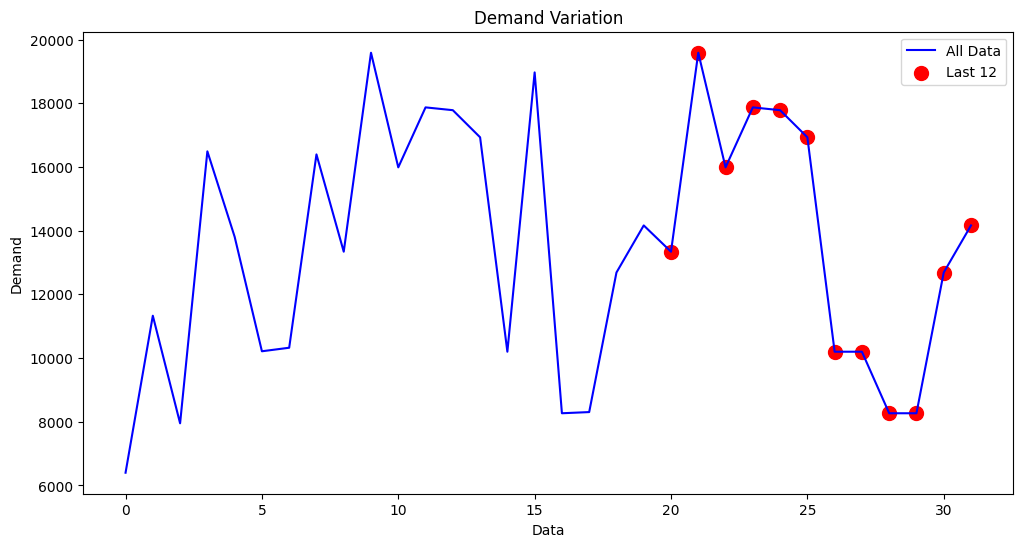

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_dt.index, df_dt['Demand'], label='All Data', color='blue')
plt.scatter(df_dt.index[-12:], df_dt['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_dt['Percentage Change'] = df_dt['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_dt['Percentage Change'] >= -tolerance) & (df_dt['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.


### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_rf = df.copy()

In [ ]:
features = df_rf[['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
target = df_rf['Demand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = model_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)

Mean Squared Error: 22305594.312325


In [ ]:
next_12_data = df_rf.iloc[-12:][['QTY_GARANTY_S', 'INVENTORY_QTY', 'KHARID']]
next_12_predictions = model_rf.predict(next_12_data)
print("Next 12 Predictions:", next_12_predictions)

Next 12 Predictions: [12962.54 18732.16 16403.68 17150.97 16583.47 14638.64 12296.99 11702.39
 10410.47 11279.56 12511.28 13904.77]


In [ ]:
df_to_append = pd.DataFrame(columns=df_rf.columns)

df_to_append['Demand'] = next_12_predictions

for column in df_to_append.columns:
    if column != 'Demand':
        df_to_append[column] = 0

df_rf = pd.concat([df_rf, df_to_append], ignore_index=True)

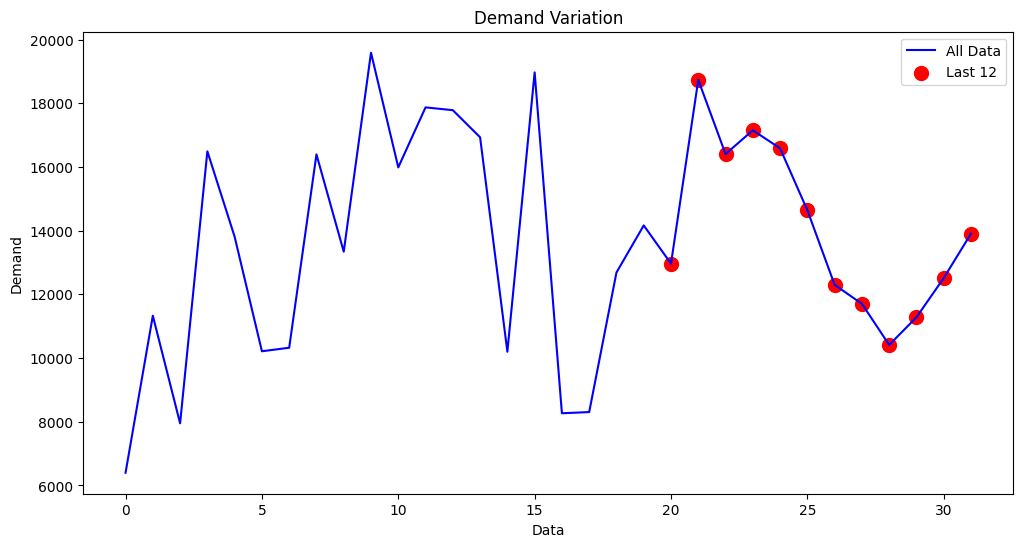

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_rf.index, df_rf['Demand'], label='All Data', color='blue')
plt.scatter(df_rf.index[-12:], df_rf['Demand'].tail(12), color='red', label='Last 12', s=100)

plt.xlabel('Data')
plt.ylabel('Demand')
plt.title('Demand Variation')
plt.legend()

plt.show()

In [ ]:
df_rf['Percentage Change'] = df_rf['Demand'].pct_change() * 100

tolerance = 20
increasing_trend = ((df_rf['Percentage Change'] >= -tolerance) & (df_rf['Percentage Change'] <= tolerance)).all()

if increasing_trend:
    print("The product has an increasing trend with a tolerance of 20%.")
else:
    print("The product has a decreasing trend with a tolerance of 20%.")

The product has a decreasing trend with a tolerance of 20%.
